<a href="https://colab.research.google.com/github/Sakthi-kc/BigData/blob/master/HeightWeight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#start here 

''' 
This is the comments section where you include the processes performed, 
You can also give +Text and add as text
Give a clear explanation on what you are trying to do in this block now
'''
#import stmts

import pandas as pd  # for dataframes
import numpy as np  # for matrix operations of csv
from sklearn.preprocessing import StandardScaler # for stdzn
from sklearn import preprocessing # for preprocessing data
from sklearn.model_selection import train_test_split # for training and accuracy
import matplotlib.pyplot as plt # for data visualizn

In [ ]:
#upload code here

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('datasets_34879_46976_500_Person_Gender_Height_Weight_Index.csv')

Saving datasets_34879_46976_500_Person_Gender_Height_Weight_Index.csv to datasets_34879_46976_500_Person_Gender_Height_Weight_Index (1).csv


In [ ]:
#data analysis

print(df.describe())
print(df.info())

           Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB
None


Text(0.5, 1.0, 'Gender')
(array([245.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 255.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)


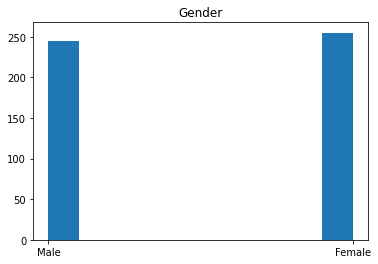

None
Text(0.5, 1.0, 'Height')
(array([42., 45., 50., 47., 60., 42., 62., 69., 47., 36.]), array([140. , 145.9, 151.8, 157.7, 163.6, 169.5, 175.4, 181.3, 187.2,
       193.1, 199. ]), <a list of 10 Patch objects>)


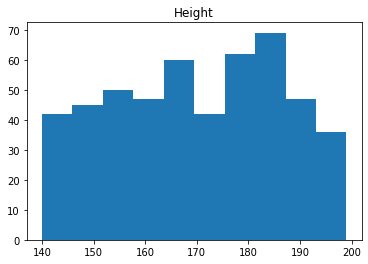

None
Text(0.5, 1.0, 'Weight')
(array([49., 49., 44., 46., 55., 54., 44., 40., 61., 58.]), array([ 50.,  61.,  72.,  83.,  94., 105., 116., 127., 138., 149., 160.]), <a list of 10 Patch objects>)


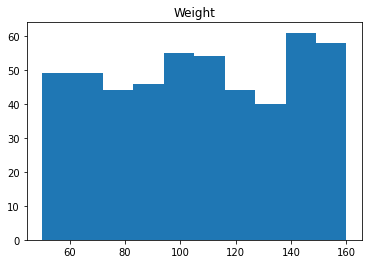

None
Text(0.5, 1.0, 'Index')
(array([ 13.,   0.,  22.,   0.,  69.,   0.,  68.,   0., 130., 198.]), array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]), <a list of 10 Patch objects>)


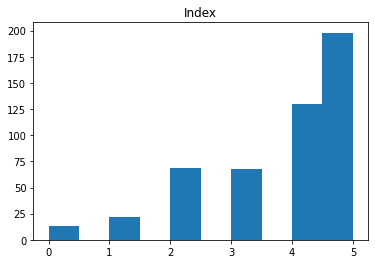

None


In [ ]:
#data visualisation

col = df.columns
for i in col:
  print(plt.title(i))
  print(plt.hist(df[i]))
  print(plt.show())

In [ ]:
#remove duplicates
df=df.drop_duplicates(col,keep=False)
df = df.reset_index(drop=True)
print(df)

     Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3      Male     149      61      3
4      Male     189     104      3
..      ...     ...     ...    ...
473  Female     150     153      5
474  Female     184     121      4
475  Female     141     136      5
476    Male     150      95      5
477    Male     173     131      5

[478 rows x 4 columns]


In [ ]:
#remove outliers
for i in ['Height','Weight','Index']:
  mini = (df[i].quantile(0.005))
  maxi = (df[i].quantile(0.995))
  df[i] = np.where(df[i] <mini, mini,df[i])
  df[i] = np.where(df[i] >maxi, maxi,df[i])
print(df)

     Gender  Height  Weight  Index
0      Male   174.0    96.0    4.0
1      Male   189.0    87.0    2.0
2    Female   185.0   110.0    4.0
3      Male   149.0    61.0    3.0
4      Male   189.0   104.0    3.0
..      ...     ...     ...    ...
473  Female   150.0   153.0    5.0
474  Female   184.0   121.0    4.0
475  Female   141.0   136.0    5.0
476    Male   150.0    95.0    5.0
477    Male   173.0   131.0    5.0

[478 rows x 4 columns]


Text(0.5, 1.0, 'Height graph')
(array([38., 45., 50., 47., 56., 38., 58., 53., 54., 39.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)


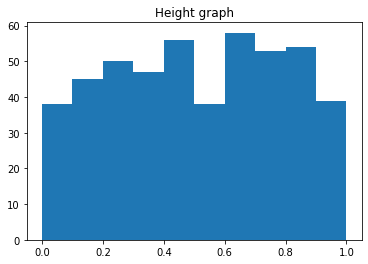

None
Text(0.5, 1.0, 'Weight graph')
(array([47., 45., 49., 36., 54., 50., 44., 41., 60., 52.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)


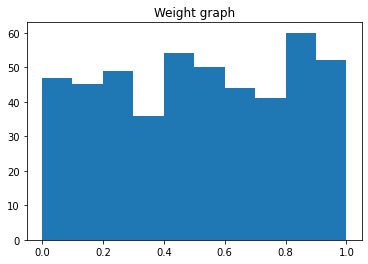

None
Text(0.5, 1.0, 'Index graph')
(array([ 13.,   0.,  18.,   0.,  69.,   0.,  60.,   0., 126., 192.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)


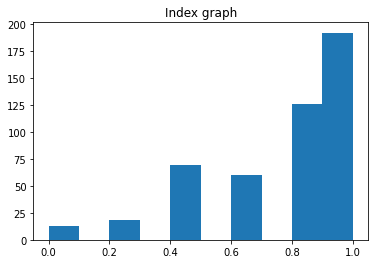

None


In [ ]:
#normalisation

x=df[['Height','Weight','Index']]
scaler = preprocessing.MinMaxScaler()
df = scaler.fit_transform(x)
df = pd.DataFrame(df, columns = ['Height','Weight','Index'])
for i in ['Height','Weight','Index']:
      print(plt.title(i+" graph"))
      print(plt.hist(df[i]))
      print(plt.show())

In [ ]:
#x-y train test spilt 67-33

x=df[['Height','Weight']]
y=df[['Index']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)
print(y_train,y_test)

     Index
51     0.8
205    1.0
380    0.6
320    0.4
106    0.6
..     ...
323    1.0
192    0.2
117    0.8
47     1.0
172    1.0

[320 rows x 1 columns]      Index
15     1.0
124    0.8
188    0.8
155    0.4
378    0.6
..     ...
457    0.4
352    0.8
171    0.6
422    1.0
433    0.0

[158 rows x 1 columns]


In [ ]:
#random forest

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.04262025316455711
Mean Squared Error: 0.005391468354430388
Root Mean Squared Error: 0.07342661884106055


Confusion Matrix: [[ 32   3]
 [  4 119]]
Accuracy: 0.9556962025316456


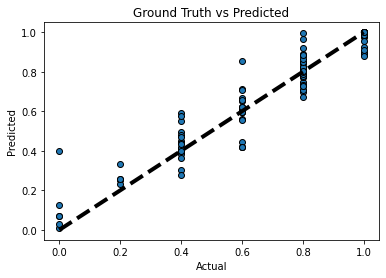

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

print("Confusion Matrix:",confusion_matrix(y_test.round(),y_pred.round()))
print("Accuracy:",accuracy_score(y_test.round(), y_pred.round()))
fig, ax = plt.subplots()

ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [ ]:
#linear

from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.09594326556904094
Mean Squared Error: 0.014553283082301461
Root Mean Squared Error: 0.120636988864533


Confusion Matrix: [[ 29   6]
 [  0 123]]
Accuracy: 0.9620253164556962


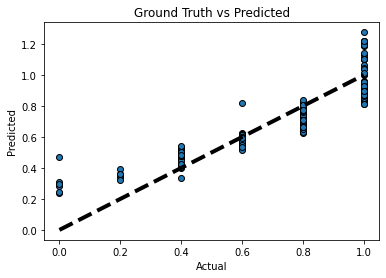

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

print("Confusion Matrix:",confusion_matrix(y_test.round(),y_pred.round()))
print("Accuracy:",accuracy_score(y_test.round(), y_pred.round()))
fig, ax = plt.subplots()

ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor  

regressor = DecisionTreeRegressor(random_state = 0)  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test) 

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.03417721518987346
Mean Squared Error: 0.007341772151898732
Root Mean Squared Error: 0.0856841417760529


Confusion Matrix: [[ 30   5]
 [  4 119]]
Accuracy: 0.9430379746835443


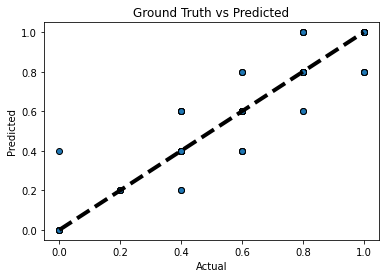

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

print("Confusion Matrix:",confusion_matrix(y_test.round(),y_pred.round()))
print("Accuracy:",accuracy_score(y_test.round(), y_pred.round()))
fig, ax = plt.subplots()

ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [ ]:
x=df[['Height','Weight']]
y=df[['Index']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=0)
print(y_train,y_test)

     Index
408    0.8
405    0.2
108    1.0
367    1.0
218    0.8
..     ...
323    1.0
192    0.2
117    0.8
47     1.0
172    1.0

[239 rows x 1 columns]      Index
15     1.0
124    0.8
188    0.8
155    0.4
378    0.6
..     ...
199    0.8
173    0.6
467    1.0
432    1.0
469    1.0

[239 rows x 1 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn import linear_model
regr = linear_model.LogisticRegression(solver='liblinear', random_state=0)
regr.fit(X_train,y_train.astype(int))
y_pred = regr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4100418410041841
Mean Squared Error: 0.28652719665271975
Root Mean Squared Error: 0.5352823522709484


Confusion Matrix: [[ 51   0]
 [108  80]]
Accuracy: 0.5481171548117155


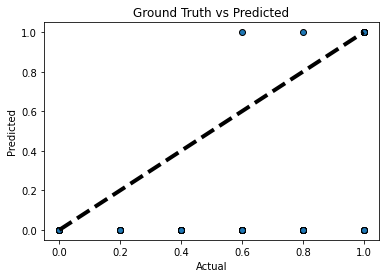

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

print("Confusion Matrix:",confusion_matrix(y_test.round(),y_pred.round()))
print("Accuracy:",accuracy_score(y_test.round(), y_pred.round()))
fig, ax = plt.subplots()

ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [ ]:
#apply model

#random forest, adaboost, xgb, linear, logistic, decision tree
#accuracy below each model, confusion matrix, best score respt